This Prediction is about Recommending Movies to the customer. The data consists of 105339 ratings applied over 10329 movies.

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing of Data Files

In [2]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [3]:
#checking the informarion of movies data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [4]:
#checking the information of ratings data
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [5]:
#Checking total rows and columns of movies data
movies.shape

(10329, 3)

In [6]:
#Checking total rows and columns of ratings data
ratings.shape

(105339, 4)

In [7]:
#Checking statistical data for movies data
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [8]:
#checcking statistical data for ratings data
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [9]:
genres=[]
for genre in movies.genres:
    x=genre.split('|')
    for i in x:
        if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [10]:
#importing wordcloud to see the visual representation of text data
from wordcloud import WordCloud

In [11]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='black',min_font_size=2,min_word_length=3).generate(movie_title)

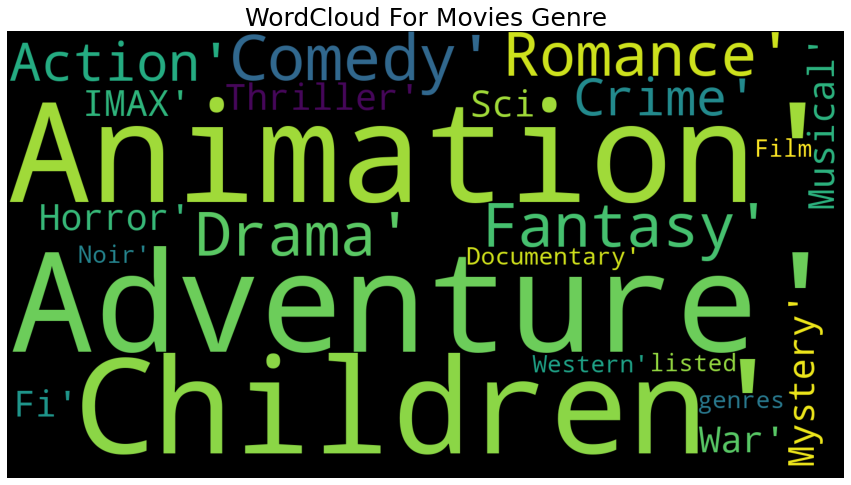

In [12]:
#ploting of wordcloud of movies
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title('WordCloud For Movies Genre',fontsize=25)
plt.imshow(wordcloud_genre)

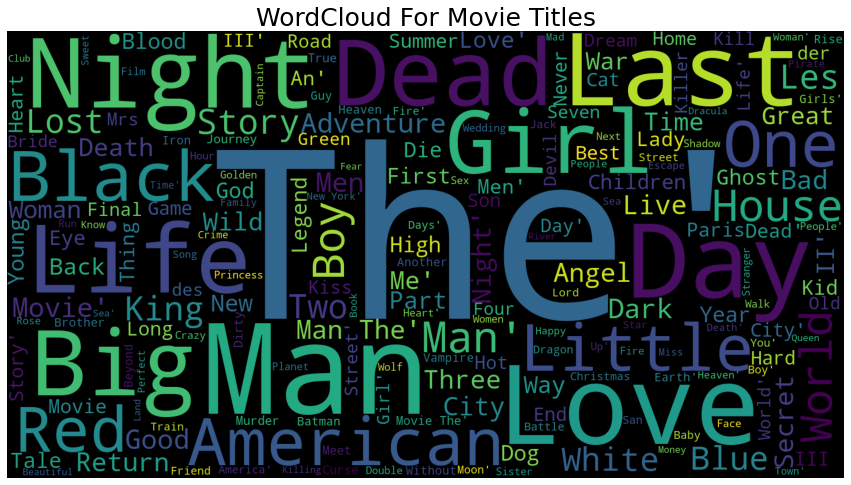

In [13]:
#ploting of wordcloud for movie titles
plt.figure(figsize=(15,10))
plt.axis(False)
plt.title('WordCloud For Movie Titles',fontsize=25)
plt.imshow(wordcloud_title)

In [14]:
#Merging of both datasets

merge=pd.merge(ratings,movies, how='left', on='movieId')

In [15]:
merge.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [16]:
#checking the sum of titles and ratings data and finding top20 ratings

title_rating=merge.groupby(['title'])[['rating']].sum()
highest_rating=title_rating.nlargest(20,'rating')
highest_rating.head(20)

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


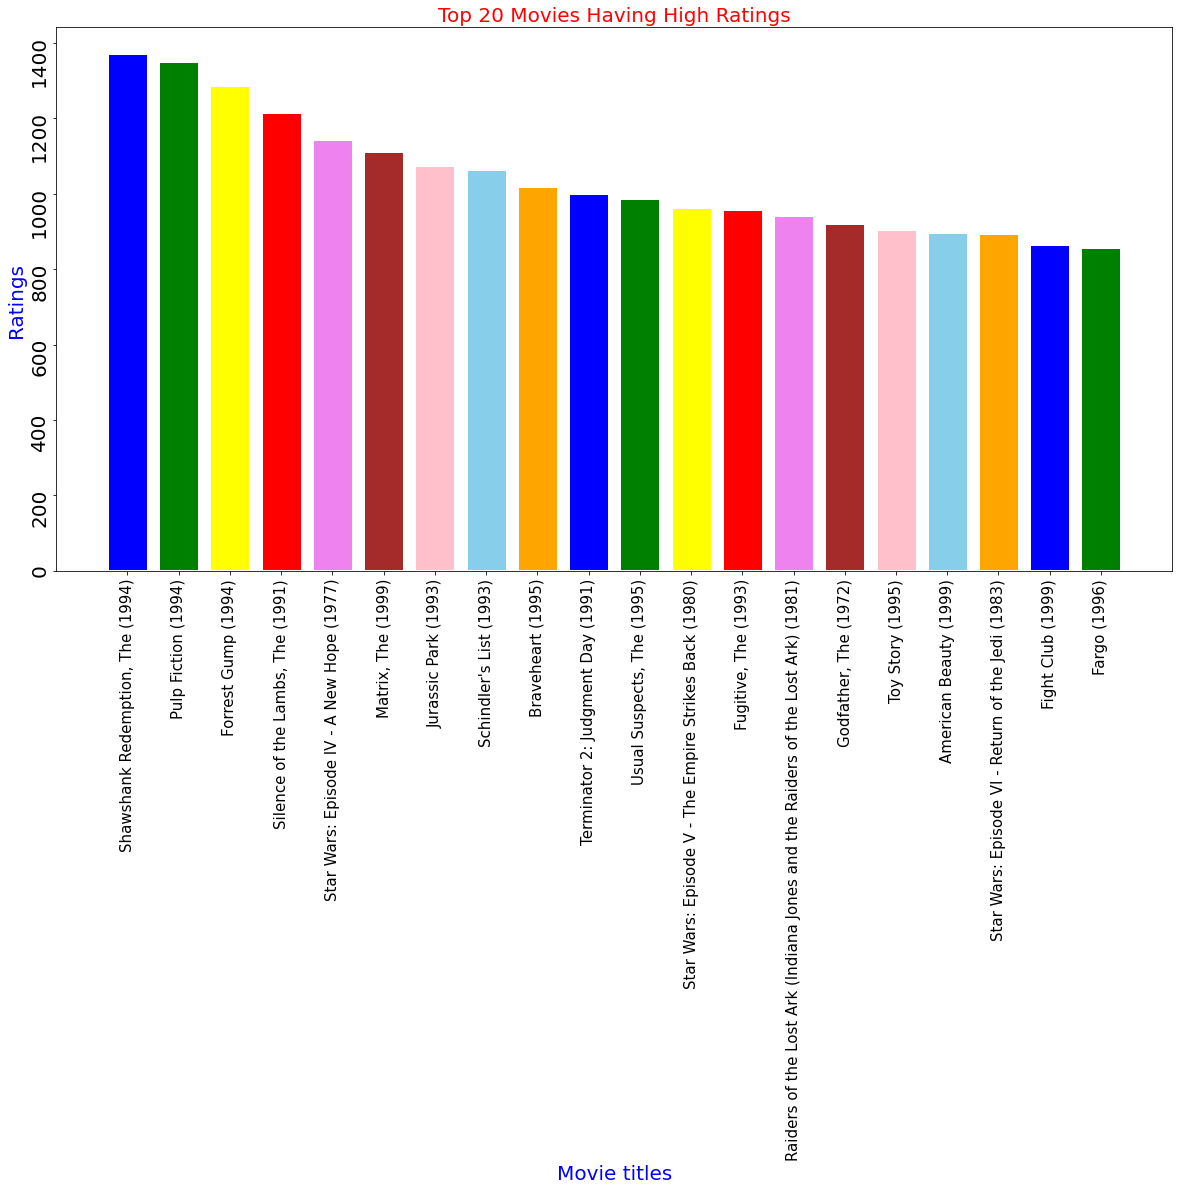

In [17]:
#ploting of top20 movies which are having high ratings

plt.figure(figsize=(20,10))
plt.title('Top 20 Movies Having High Ratings',fontsize=20,color='Red')
colors=['blue','green','yellow','red','violet','brown','pink','skyblue','orange']

plt.xlabel('Movie titles',fontsize=20,color='blue')
plt.xticks(fontsize=15,rotation=90)

plt.ylabel('Ratings',fontsize=20,color='Blue')
plt.yticks(fontsize=20,rotation=90)

plt.bar(highest_rating.index,highest_rating['rating'],linewidth=3,edgecolor='white',color=colors)
plt.show()

In [18]:
#checking the total count and finding top20 ratings

title_rating1=merge.groupby(['title'])[['rating']].count()
highest_rating1=title_rating1.nlargest(20,'rating')
highest_rating1.head(20)

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290
Star Wars: Episode IV - A New Hope (1977),273
"Matrix, The (1999)",261
Terminator 2: Judgment Day (1991),253
Braveheart (1995),248


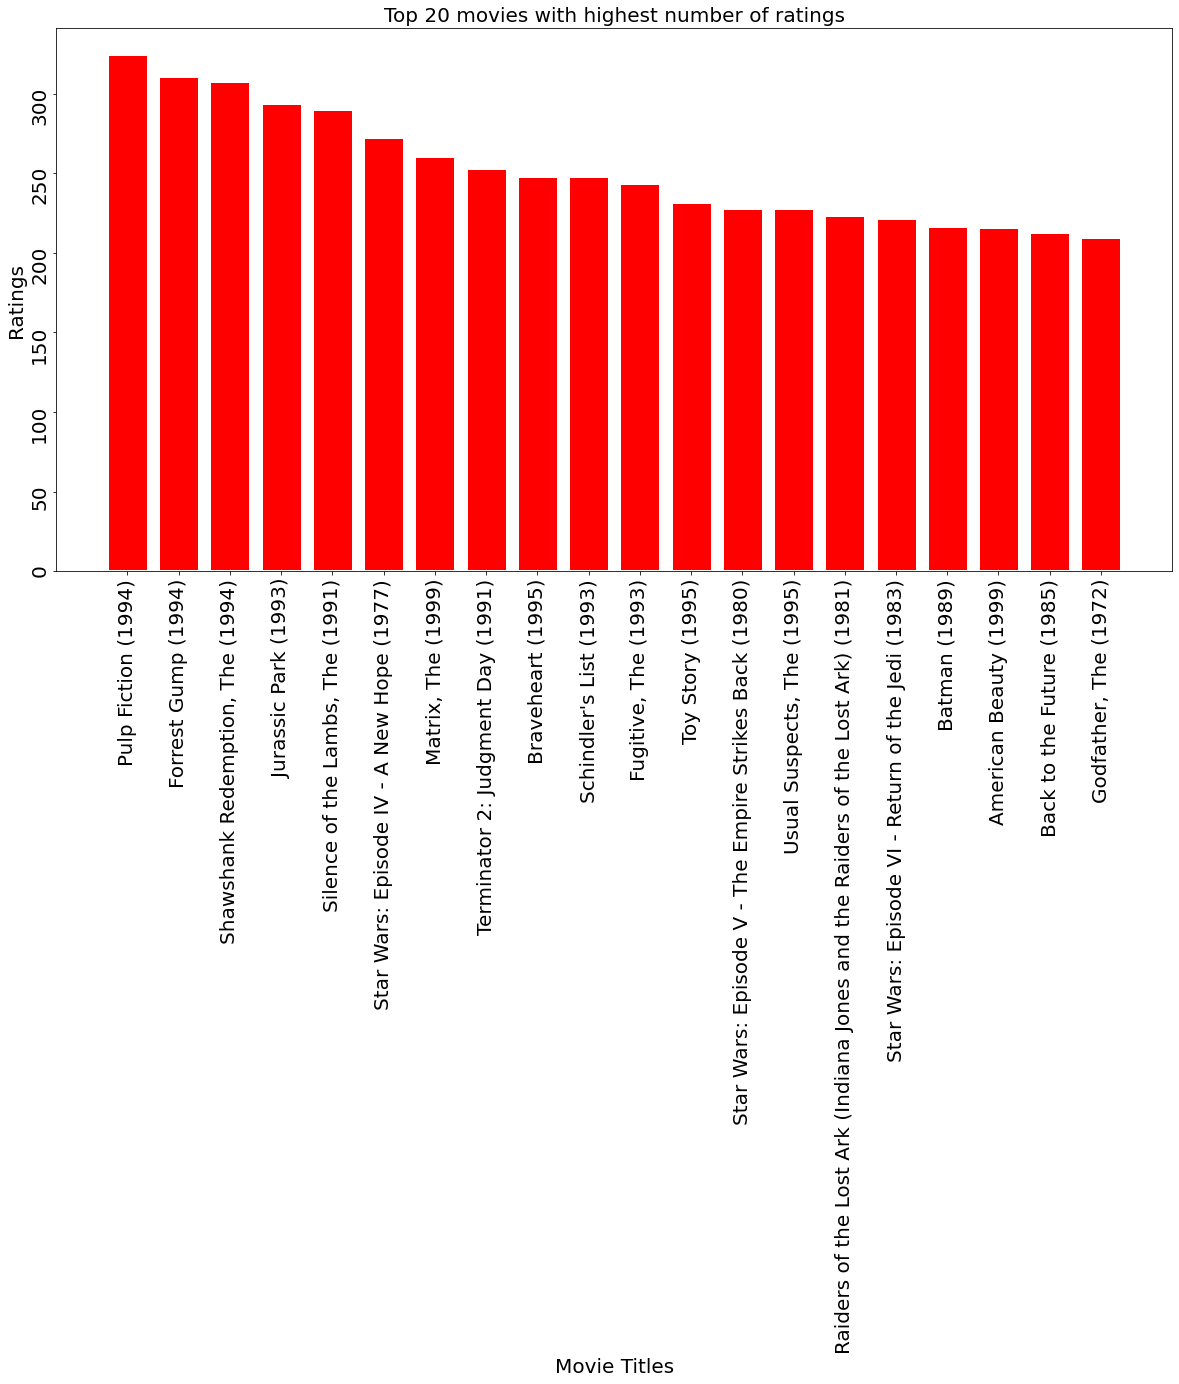

In [19]:
#checking top20 movies which are having highest number of ratings
plt.figure(figsize=(20,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=20)
colors=['red']

plt.xlabel('Movie Titles',fontsize=20)
plt.xticks(rotation=90,fontsize=20)

plt.ylabel('Ratings',fontsize=20)
plt.yticks(rotation=90,fontsize=20)

plt.bar(highest_rating1.index,highest_rating1['rating'],linewidth=3,edgecolor='white',color=colors)
plt.show()

In [20]:
#importing Tfidfvectroizer transform text into a meaningful representation of numbers 
from sklearn.feature_extraction.text import TfidfVectorizer

vector=TfidfVectorizer()

In [21]:
# convert the documents into a matrix

tfidv_matrix=vector.fit_transform(movies['genres'])

In [22]:
#table will be stored in MultiIndex objects on the index and columns of the result DataFrame.
movie_user=merge.pivot_table(index='userId',columns='title',values='rating')

In [23]:
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


supose user wants to watch a movie similar to Til There Was You (1997) then we can recommend the user by calculating the consine similarity between Til There Was You (1997) and other movies. so we have to find the cosine similarity. 

In [24]:
#it used to check how similar the documnets are irrespective of their size

from sklearn.metrics.pairwise import linear_kernel

In [25]:
cosine_sim=linear_kernel(tfidv_matrix,tfidv_matrix)

In [26]:
cosine_sim

array([[1.        , 0.79977247, 0.1589222 , ..., 0.2638368 , 0.        ,
        0.        ],
       [0.79977247, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1589222 , 0.        , 1.        , ..., 0.60235038, 0.        ,
        0.        ],
       ...,
       [0.2638368 , 0.        , 0.60235038, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [27]:
#from sklearn.metrics.pairwise import linear_kernel
#cosine_sim = linear_kernel(tfidv_matrix, tfidv_matrix)

#can use both cosine_similarity and linear_kernel , how similar the documents are irrespective of their size.

In [28]:
#cosine_sim

In [29]:
group=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    index1=group[title]
    sim_scores = list(enumerate(cosine_sim[index1]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_group = [i[0] for i in sim_scores]
    return titles.iloc[movie_group]

In [30]:
#Resulting the recommendations

recommendations('Toy Story (1995)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198

In [31]:
recommendations('Adventures of Rocky and Bullwinkle, The (2000)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198

In [32]:
recommendations('(500) Days of Summer (2009)')

10                  American President, The (1995)
48                         Mighty Aphrodite (1995)
53               Postman, The (Postino, Il) (1994)
86                          Beautiful Girls (1996)
168                 Something to Talk About (1995)
195                        Don Juan DeMarco (1995)
203    Eat Drink Man Woman (Yin shi nan nu) (1994)
250                           Nobody's Fool (1994)
311                        Corrina, Corrina (1994)
320                  It Could Happen to You (1994)
331                           Reality Bites (1994)
482                    Sleepless in Seattle (1993)
485                              Son in Law (1993)
631                    Month by the Lake, A (1995)
659                     Walking and Talking (1996)
682                                    Emma (1996)
693                                 Tin Cup (1996)
715                           Twelfth Night (1996)
719                 Philadelphia Story, The (1940)
730                          Ap